## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [31]:
import os
import keras

In [32]:
train, test = keras.datasets.cifar10.load_data()

In [33]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [34]:
x_train.shape[1]

3072

In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense
def build_mlp():
    
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

In [36]:
optimizer = keras.optimizers.Adam(lr=0.001)
epochs = 500

model = build_mlp()

model.compile(optimizer=optimizer,
             loss='categorical_crossentropy',
             metrics=['accuracy'])


print(model.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
history=model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)
model.save('nn_500ep.h5') 

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 2s 31us/step - loss: 1.9033 - acc: 0.3166 - val_loss: 1.7566 - val_acc: 0.3725
Epoch 2/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.6940 - acc: 0.3947 - val_loss: 1.6077 - val_acc: 0.4281
Epoch 3/500
50000/50000 [==============================] - 1s 21us/step - loss: 1.5995 - acc: 0.4305 - val_loss: 1.5533 - val_acc: 0.4502
Epoch 4/500
50000/50000 [==============================] - 1s 21us/step - loss: 1.5421 - acc: 0.4500 - val_loss: 1.5343 - val_acc: 0.4562
Epoch 5/500
50000/50000 [==============================] - 1s 21us/step - loss: 1.4955 - acc: 0.4677 - val_loss: 1.5023 - val_acc: 0.4628
Epoch 6/500
50000/50000 [==============================] - 1s 21us/step - loss: 1.4707 - acc: 0.4757 - val_loss: 1.5047 - val_acc: 0.4631
Epoch 7/500
50000/50000 [==============================] - 1s 21us/step - loss: 1.4362 - acc: 0.4850 - val_loss: 1.4616 - 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
def plot_loss_acc(history_dict, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']

    epochs = range(1, len(loss_values) + 1)

    ax1.plot(epochs, loss_values, 'k:', label='training loss')
    ax1.plot(epochs, val_loss_values, 'b--', label='validation loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.set_title(title)

    ax2.plot(epochs, acc_values, 'k:', label='training accuracy')
    ax2.plot(epochs, val_acc_values, 'b--', label='validation accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.set_title(title)
    plt.tight_layout()
    plt.show()

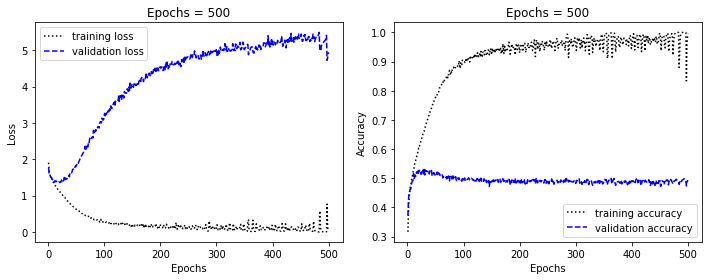

In [38]:

%matplotlib inline
import matplotlib.pyplot as plt

plot_loss_acc(history.history, title=f"Epochs = 500")

In [ ]:
optimizer = 'sgd'
epochs = 100

model = build_mlp()

model.compile(optimizer=optimizer,
             loss='categorical_crossentropy',
             metrics=['accuracy'])


print(model.summary())

history = model.fit(x_train, y_train, 
                  epochs=epochs, 
                  batch_size=256, 
                  validation_data=(x_test, y_test), 
                  verbose=2)

plot_loss_acc(history.history, title=f"Epochs = {epochs}")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
None
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 1s - loss: 2.0817 - acc: 0.2631 - val_loss: 1.9380 - val_acc: 0.3154
Epoch 2/100
 - 1s - loss: 1.8851 - acc: 0.3361 - val_loss: 1.8924 - val_acc: 0.3232
Epoch 3/100
 - 1s - loss: 1.8190 - acc: 0